# Giapetto’s Woodcarving

##  Solving with CBC

In [1]:
from IPython.display import Image
Image(filename='OpenModel.png') 

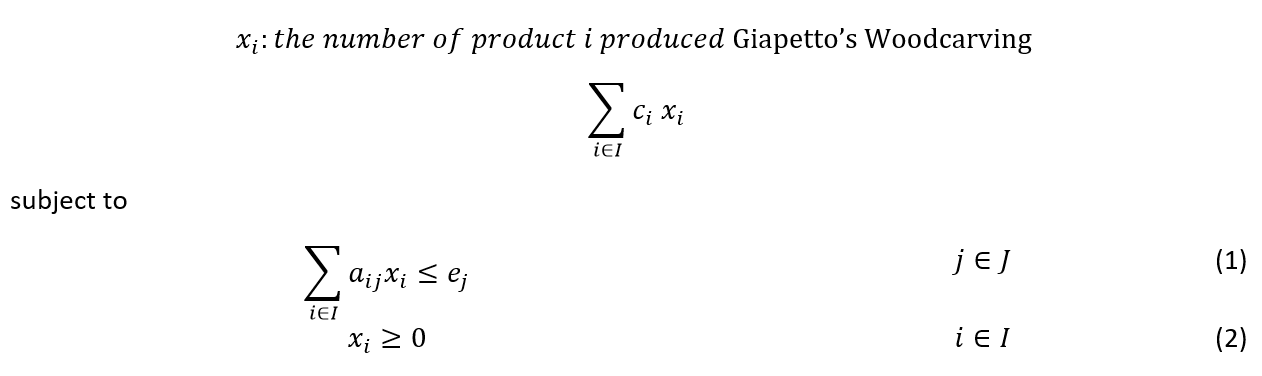

In [2]:
Image(filename='ClosedForm.png')

### 1. Import PuLP modeller functions

In [3]:
from pulp import *

### 2. Define required parameters

In [4]:
Toys = ["Soldier", "Train"]

Skills = ["Carpentry", "Finishing"]

SkillCapacity = {"Carpentry": 80,
                 "Finishing": 100}

Requirements = {"Soldier": {"Carpentry":1,
                            "Finishing":2},
                "Train": {"Carpentry":1,
                          "Finishing":1}}

Cost = {"Train":2, 
        "Soldier": 3}

### 3. Creates the prob variable to contain the problem data

In [5]:
prob = LpProblem("Giapetto’s_Woodcarving", LpMaximize)

### 4. Define decision variable

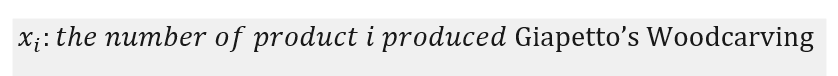

In [6]:
Image(filename='DecisionVariable.png')

In [7]:
X = LpVariable.dicts("x",
                     (Toys),
                     lowBound=0,
                     upBound=None,
                     cat=const.LpInteger)

### 5. Define objective function

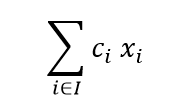

In [8]:
Image(filename='Objective.png')

In [9]:
prob += lpSum(X[i]*Cost[i] for i in Toys)

### 6. Define constraints

#### Constraint 1

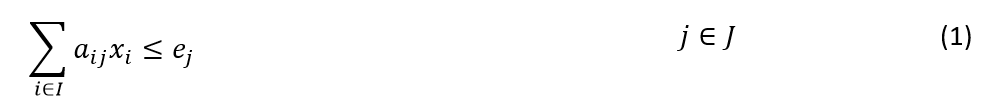

In [10]:
Image(filename='Constraint1.png') 

In [11]:
for j in Skills:
    prob += lpSum(Requirements[i][j]*X[i] for i in Toys) <= SkillCapacity[j]

### 7. Solve problem

In [12]:
prob.solve()

1

### 8. Print problem status

In [13]:
print("STATUS IS: ", LpStatus[prob.status])

STATUS IS:  Optimal


### 9. Print decision variables which take value in the solution

In [14]:
for v in prob.variables():
    if v.varValue > 0.1:
        print(v.name, "=", v.varValue)

x_Soldier = 20.0
x_Train = 60.0


### 10. Print objective function

In [15]:
print("Total Maximization = ", value(prob.objective))

Total Maximization =  180.0


In [16]:
#Print decision variables
print("Decision Variables")
print(prob.variables())


# Open form of the constraints
print("Open Form of the Mathematical Model")
print(prob)

Decision Variables
[x_Soldier, x_Train]
Open Form of the Mathematical Model
Giapetto’s_Woodcarving:
MAXIMIZE
3*x_Soldier + 2*x_Train + 0
SUBJECT TO
_C1: x_Soldier + x_Train <= 80

_C2: 2 x_Soldier + x_Train <= 100

VARIABLES
0 <= x_Soldier Integer
0 <= x_Train Integer

